<a href="https://colab.research.google.com/github/harshavardhanguda/RAIAC/blob/master/RAIAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import libraries

In [1]:
import numpy
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plot
from tensorflow.keras import backend as k
from tensorflow.keras.datasets import mnist
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Load Data

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
plot.imshow(x_train[225], cmap = 'gray')

In [0]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [0]:
img_rows,img_cols = 28,28

if k.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

### Create Model

In [5]:
model = tf.keras.models.Sequential()
model.add(layers.Input((28,28,1)))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### Set  training parameter and train network

In [6]:
opt = tf.keras.optimizers.SGD(lr=1e-2,momentum=0.9)
model.compile(optimizer=opt,metrics=['accuracy'],loss='categorical_crossentropy')
model.fit(x_train,y_train,batch_size=32,validation_data=(x_test,y_test),epochs=10)#,callbacks=[csv_logger,tensorboard_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2807 - acc: 0.9166 - val_loss: 0.1361 - val_acc: 0.9577
Epoch 2/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1192 - acc: 0.9644 - val_loss: 0.1114 - val_acc: 0.9664
Epoch 3/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0847 - acc: 0.9742 - val_loss: 0.0840 - val_acc: 0.9727
Epoch 4/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0639 - acc: 0.9797 - val_loss: 0.0807 - val_acc: 0.9741
Epoch 5/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0506 - acc: 0.9843 - val_loss: 0.0828 - val_acc: 0.9738
Epoch 6/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0398 - acc: 0.9876 - val_loss: 0.0830 - val_acc: 0.9744
Epoch 7/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0324 - acc: 0.9898 - val_loss: 0

In [0]:
path = 'content/drive/My Drive/model_template.hdf5'
model.save(path)

The predicted number:  7


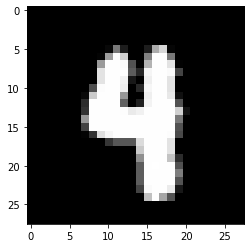

In [13]:
plot.imshow(x_test[250,:,:,0], cmap = 'gray')
preds = model.predict(x_test[0:1])
i = preds.argmax(axis=1)[0]
print("The predicted number: ",i)

Callbacks

Transfer Learning